## ***World Happiness Report - An analysis from 2015 to 2021***
---

Work by:

> Yooeun Park

# Contents
* [Introduction](#Introduction)
* [Part 0: Clean up the raw data](#part-0)
* [Part 1: Where are the happiest countries located? ](#part-1)
* [Part 2: Where are the least happy countries located?](#part-2)
* [Part 3: What makes a country happy?](#part-3)
* [Part 4: What are other factors that can improve happiness?](#part-4)
* [Part 5: Is United States a happy country?](#part-5)



<a name="Introduction"></a>
# Introduction

The world happiness report is based on the survey on answers to the main life evaluation question asked in the poll. This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. 

*  **GDP per capita**: GDP per capita
*  **Health**: Healthy Life Expectancy
*  **Family**: the national average responses to the GWP question: “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
*  **Freedom**: the national average of responses to the GWP question: “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
*  **Government Corruption**: the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” 
*  **Generosity**: the national average of responses to the GWP question: “Have you donated money to a charity in the past month?” on GDP per capita.

Source: https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf



<a name="part-0"></a>
# Part 0: Cleaning up raw data

In [ ]:
#Loading Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Loading data, reading in files
df_15 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2015.csv')
df_16 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2016.csv')
df_17 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2017.csv')
df_18 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2018.csv')
df_19 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2019.csv')
df_20 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2020.csv')
df_21 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2021.csv')

In [ ]:
#Dropping Null values 
df_15 = df_15.dropna()
df_16 = df_16.dropna()
df_17 = df_17.dropna()
df_18 = df_18.dropna()
df_19 = df_19.dropna()
df_20 = df_20.dropna()
df_21 = df_21.dropna()

In [ ]:
#Removing unnecessary columns 
df_16 = df_16.drop(columns = ['Lower Confidence Interval', 'Upper Confidence Interval'])
df_16.head(5)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
#Removing unnecessary columns
df_21 = df_21.drop(columns = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Dystopia + residual', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'])
df_21.head(5)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [ ]:
# Renaming columns to make sure the column names are consistent across the years
df_15 = df_15.rename(columns = {'Happiness Rank':'Rank', 'Happiness Score' : 'Score', 
                                      'Economy (GDP per Capita)' : 'gdp_per_capita', 'Health (Life Expectancy)' : 'Health',
                                      'Trust (Government Corruption)' : 'gov_corruption', 'Dystopia Residual' : 'Dystopia'})
df_15['Year'] = 2015

df_16 = df_16.rename(columns = {'Happiness Rank':'Rank', 'Happiness Score' : 'Score', 
                                      'Economy (GDP per Capita)' : 'gdp_per_capita', 'Health (Life Expectancy)' : 'Health',
                                      'Trust (Government Corruption)' : 'gov_corruption', 'Dystopia Residual' : 'Dystopia'})
df_16['Year'] = 2016

df_17 = df_17.rename(columns = {'Happiness.Rank':'Rank', 'Happiness.Score' : 'Score', 
                                      'Economy..GDP.per.Capita.' : 'gdp_per_capita', 'Health..Life.Expectancy.' : 'Health',
                                      'Trust..Government.Corruption.' : 'gov_corruption', 'Dystopia.Residual' : 'Dystopia'})
df_17['Year'] = 2017 
df_18 = df_18.rename(columns = {'Overall rank':'Rank', 'Country or region' : 'Country',
                                      'GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health','Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'gov_corruption'})
df_18['Year'] = 2018

df_19 = df_19.rename(columns = {'Overall rank':'Rank', 'Country or region' : 'Country',
                                      'GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'gov_corruption'})
df_19['Year'] = 2019 

df_20 = df_20.rename(columns = {'Happiness Rank': 'Rank', 'Country name' : 'Country', 'Regional indicator': 'Region', 'Ladder score' : 'Score', 
                                      'Logged GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'gov_corruption'})
df_20['Rank'] =  range(1, len(df_20.index)+1)
df_20['Year'] = 2020 


df_21 = df_21.rename(columns = {'Happiness Rank': 'Rank', 'Country name' : 'Country', 'Regional indicator': 'Region', 'Ladder score' : 'Score', 
                                      'Logged GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'gov_corruption'})
df_21['Rank'] =  range(1, len(df_21.index)+1)
df_21['Year'] = 2021


df_21.head(5)

,Country,Region,Score,gdp_per_capita,Family,Health,Freedom,Generosity,gov_corruption,Rank,Year
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,1,2021
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2,2021
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,3,2021
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,4,2021
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,5,2021


In [ ]:
#Storing Each Data from 2015 - 2021 into New Data Frame
datarank = pd.DataFrame(columns = ['Country', 'Rank', 'Score', 'gdp_per_capita',
                                   'Family', 'Health', 'Freedom','gov_corruption',
                                   'Generosity', 'Year'])
n = [df_15, df_16, df_17, df_18, df_19, df_20, df_21]
for i in n:
    datarank = datarank.append(i[['Country', 'Rank', 'Score', 'gdp_per_capita',
                                   'Family', 'Health', 'Freedom','gov_corruption',
                                   'Generosity', 'Year']])

In [ ]:
datarank.head(5)

,Country,Rank,Score,gdp_per_capita,Family,Health,Freedom,gov_corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


<a name="part-1"></a>
# Part 1: Where are the happiest countries located?

In [ ]:
import json

In [ ]:
#Uploading geojson file to create maps with statistical information
path = 'https://raw.githubusercontent.com/IlarjaL/CIS9655/f2813cb5843c6ab1a0ee4ee431434e34d915d53c/countries.geojson'
states = pd.read_json(path)

In [ ]:
#Creating a mapping for the states in between the source file and the geojson
state_id_map = {}
for feature in states['features']:
  feature['id'] = feature['properties']['ISO_A3']
  state_id_map[feature['properties']['ADMIN']] = feature['id']

In [ ]:
states['features'][1]['properties']

{'ADMIN': 'Afghanistan', 'ISO_A3': 'AFG'}

In [ ]:
#Replacing naming conventions for some states to overcome differences between the two data sources
datarank['Country'].replace(['United States', 'Trinidad & Tobago', 'Serbia', 'Hong Kong', 'North Macedonia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Palestinian Territories', 'Tanzania', 'North Cyprus', 'Somaliland region', 'Somaliland Region', 'Taiwan Province of China', 'Hong Kong S.A.R., China', 'Hong Kong S.A.R. of China'], 
                      ['United States of America', 'Trinidad and Tobago', 'Republic of Serbia', 'Hong Kong S.A.R.', 'Macedonia', 'Democratic Republic of the Congo', 'Republic of Congo', 'Palestine', 'United Republic of Tanzania', 'Northern Cyprus', 'Somaliland', 'Somaliland', 'Taiwan', 'Hong Kong S.A.R.', 'Hong Kong S.A.R.'], inplace=True)

In [ ]:
#Creating new id column
datarank['id'] = datarank['Country'].apply(lambda x: state_id_map[x])

In [ ]:
import plotly.express as px

In [ ]:
datarank_21 = datarank[datarank.Year.eq(2021)]

In [ ]:
#Mapping out the happiness score for 2021
fig = px.choropleth(datarank_21, locations ='id', color='Score', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="Happiness score distribution in 2021", title_x=0.48, titlefont=dict(size=20), margin={"r":30,"t":30,"l":30,"b":30})
fig.show()

**Conclusion**: We can see from the visualization of the 2021 data that there are different groups of happiness in the world. The happier countries are mostly located in Western Europe, North America and Australia and New Zealand. The least happy countries are concentrated in Africa and South Asia.

In [ ]:
#Top 10 happiest countries in 2021
top10 = datarank_21.head(10)

In [ ]:
fig = px.choropleth(top10, locations ='id', color='Rank', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="Top 10 happiest countries in 2021 (during COVID-19)", title_x=0.48, titlefont=dict(size=20), margin={"r":30,"t":30,"l":30,"b":30}, 
                  legend_tracegroupgap=10, legend=dict(
    y=0.5,
    x=0.88,
    font=dict(
            size=12,
            color="black"
        ),
        bgcolor="whitesmoke",
        bordercolor="Black",
        borderwidth=1))
fig.show()

In [ ]:
#Top 10 happiest countries in 2019
datarank_19 = datarank[datarank.Year.eq(2019)]
top10_19 = datarank_19.head(10)

In [ ]:
fig = px.choropleth(top10_19, locations ='id', color='Rank', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="Top 10 happiest countries in 2019 (before COVID-19)", title_x=0.48, titlefont=dict(size=20), margin={"r":30,"t":30,"l":30,"b":30}, 
                  legend_tracegroupgap=10, legend=dict(
    y=0.5,
    x=0.88,
    font=dict(
            size=12,
            color="black"
        ),
        bgcolor="whitesmoke",
        bordercolor="Black",
        borderwidth=1))
fig.show()

**Conclusion**: Comparing the 10 happiest countries in 2019 and 2021, we wanted to see, besides the common factors, wether the global pandemic had affected hapiness in these countries. Besides Canada falling out of the Top 10 list, the other countries remained the same. One explanation for this could be the fact that most people see COVID-19 as an outside threat affecting everybody. It also needs to be considered that COVID-19 measures taken by these countries were met with little to no resistance by their population and made people feel safe and taken care of.

<a name="part-2"></a>
# Part 2: Where are the least happy countries located? 

In [ ]:
#Lower 10 countries by happiness in 2021
low10 = datarank_21.tail(10)

In [ ]:
fig = px.choropleth(low10, locations ='id', color='Score', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="10 Least happy countries in 2021", title_x=0.48, titlefont=dict(size=20), margin={"r":30,"t":30,"l":30,"b":30})
fig.show()

In [ ]:
#Lower 10 countries by happiness in 2019
low10_19 = datarank_19.tail(10)

In [ ]:
fig = px.choropleth(low10_19, locations ='id', color='Score', hover_name='Country', hover_data =['Rank'])
fig.update_layout(title_text="10 Least happy countries in 2019", title_x=0.48, titlefont=dict(size=20), margin={"r":30,"t":30,"l":30,"b":30})
fig.show()

In [ ]:
datarank_20 = datarank[datarank.Year.eq(2020)]
#Merging all three DF to one by adding suffixes
merged_data = pd.merge(pd.merge(datarank_21,datarank_20, on = "Country", how="inner", suffixes=[None,'_2020']),
                       datarank_19,on = "Country", how="inner" ,suffixes=['_2021','_2019'])

#Displaing merged Data Frame
merged_data.head(5)

,Country,Rank_2021,Score_2021,gdp_per_capita_2021,Family_2021,Health_2021,Freedom_2021,gov_corruption_2021,Generosity_2021,Year_2021,id_2021,Rank_2020,Score_2020,gdp_per_capita_2020,Family_2020,Health_2020,Freedom_2020,gov_corruption_2020,Generosity_2020,Year_2020,id_2020,Rank_2019,Score_2019,gdp_per_capita_2019,Family_2019,Health_2019,Freedom_2019,gov_corruption_2019,Generosity_2019,Year_2019,id_2019
0,Finland,1,7.842,10.775,0.954,72.0,0.949,0.186,-0.098,2021,FIN,1,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,-0.059482,2020,FIN,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019,FIN
1,Denmark,2,7.620,10.933,0.954,72.7,0.946,0.179,0.030,2021,DNK,2,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,0.066202,2020,DNK,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019,DNK
2,Switzerland,3,7.571,11.117,0.942,74.4,0.919,0.292,0.025,2021,CHE,3,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,0.105911,2020,CHE,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263,2019,CHE
3,Iceland,4,7.554,10.878,0.983,73.0,0.955,0.673,0.160,2021,ISL,4,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,0.246944,2020,ISL,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2019,ISL
4,Netherlands,5,7.464,10.932,0.942,72.4,0.913,0.338,0.175,2021,NLD,6,7.4489,10.812712,0.939139,72.300919,0.908548,0.364717,0.207612,2020,NLD,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2019,NLD


In [ ]:
#Creating a df for calculating the delta score over the years.
delta_data = pd.DataFrame(merged_data,columns = ['Country','Score_2019', 'Score_2020', 'Score_2021']) 
delta_data['Delta Cal'] = (delta_data['Score_2020']-delta_data['Score_2019']) + (delta_data['Score_2021']-delta_data['Score_2020'])

#Sorting dataframe based on delta value
delta_data= delta_data.sort_values(by=['Delta Cal'], ascending=False)

#Top and bottom countries according to Delta Score
Top_HappinessScore = delta_data.head(2)
Low_HappinessScore = delta_data.tail(2)

#Displaying low 2 based on Delta Score
Low_HappinessScore

,Country,Score_2019,Score_2020,Score_2021,Delta Cal
147,Afghanistan,3.203,2.5669,2.523,-0.680
103,Pakistan,5.653,5.6933,4.934,-0.719


In [ ]:
#Displaying Top 2 based on Delta Score
Top_HappinessScore

,Country,Score_2019,Score_2020,Score_2021,Delta Cal
85,Armenia,4.559,4.6768,5.283,0.724
118,Liberia,3.975,4.5579,4.625,0.650


**Conclusion**: The comparison of the 10 least happy countries in 2019 and 2021 contains good news and bad news. The good news is that countries like South Sudan and Central African Republic are doing better now than before, despite the effects of the pandemic. The bad news is that countries in the lower 10 of the happiness scale are doing worse than they were in 2019. For all of them the happiness score has fallen. One in particular is doing worse than others, and that is Afghanistan. Not only has the happiness deteriorated, it has dropped to the bottom of the list, making them the least happy country in the world. This is further proved by one of the lowest delta scores -0.680. It's also important to point out that information about Syria was not able to be obtained for 2020 and 2021, which slightly affects the results of this comparison.

In [ ]:
fig = px.choropleth(datarank,
			locations="id",
			color="Score",
			hover_name="Country",
      color_continuous_scale="Temps_r",
			animation_frame="Year")
fig.update_layout(title_text="Changes in Happiness Score 2015-2021", title_x=0.48, titlefont=dict(size=18), margin={"r":30,"t":70,"l":70,"b":30})

fig.show()


**Conclusion**: While looking at the change in happiness score worldwide, a common trend that can be seen is the almost uniform change throughout the years. With the exception of very few outliers, other countries seem to change in their respective groups. Happier countries are still on the happy spectrum and least happy ones do not break out from their group. We also notice the colors fading in the Americas, meaning that over the years the happiness has slightly lowered, even though there is no significant drop. On a good note, generally the colors gradually turn greener in African countries, signaling to a betterment of life and happiness in this region.

<a name="part-3"></a>
# Part 3: What makes a country happy? 


Text(0, 0.5, 'GDP per capita (Unit=10k USD)')

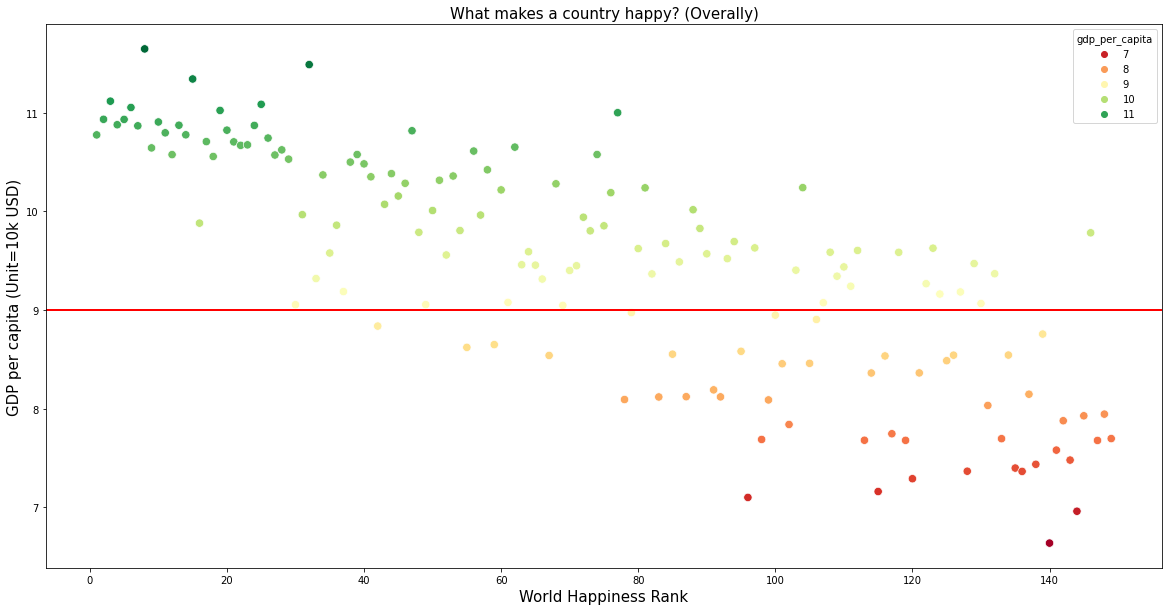

In [ ]:
plt.figure(figsize=(20,10))
plt.axhline(y=9, color='r', linewidth=2)
sns.scatterplot(x = df_21.Rank,y = df_21.gdp_per_capita, hue = df_21.gdp_per_capita,palette = "RdYlGn",s=70)

plt.title(f'What makes a country happy? (Overally)',size=15)
plt.xlabel('World Happiness Rank', size=15) 
plt.ylabel('GDP per capita (Unit=10k USD)', size=15) 


**Conclusion**: This scatter plot shows the ranking of happy countries by comparing them with GDP per captia. Most of the high-ranked left side is green (GDP per captia is high), and most of the low-ranked right side is red (GDP per captia is low). Overall, this is data to show all countries roughly. Detailed visual materials are attached below. (10 happiest countries, 10 least happiest countries)

Text(0, 0.5, 'GDP per capita (Unit=10k USD)')

<Figure size 432x288 with 0 Axes>

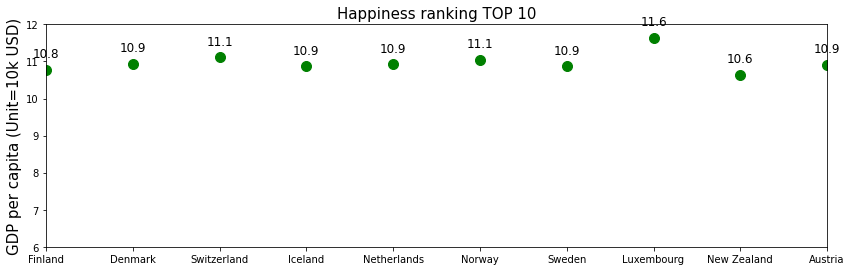

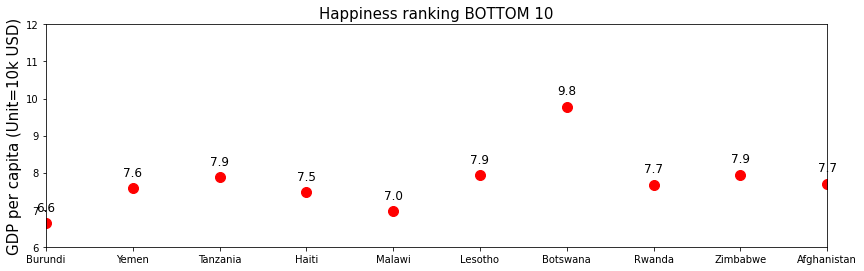

In [ ]:

x = df_21.Country                
y = df_21.gdp_per_capita        
plt.figure(1)
plt.figure(figsize=(14,9))

plt.subplot(211)
plt.xlim(0,9)
plt.ylim(6,12)


for i in range(10):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.scatter(x, y,c='green',s=100)
plt.title(f'Happiness ranking TOP 10',size=15)
plt.ylabel('GDP per capita (Unit=10k USD)',size=15)

plt.figure(figsize=(14,9))



plt.subplot(212)
plt.xlim(139,148)
plt.ylim(6,12)

for i in range(10):
    height = y[139+i]
    plt.text(x[139+i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.scatter(x, y,c='red',s=100)
plt.title(f'Happiness ranking BOTTOM 10',size=15)
plt.ylabel('GDP per capita (Unit=10k USD)',size=15)

**Conclusion** : The unit of GDP per captia was designated from 6 to 10(Unit = 10k USD). The 10 happiest countries recorded more than 10 (green), and the 10 lowest happiest countries (red) were significantly lower (red). Therefore, it can be predicted that the ranking of happiness has an effect on the economic aspect.

<a name="part-4"></a>
# Part 4: What are other factors that can improve happiness?

**It can be other factors, as well as GDP per capita, that increase happiness.**

The p-value is: 2.9617212615356554e-30


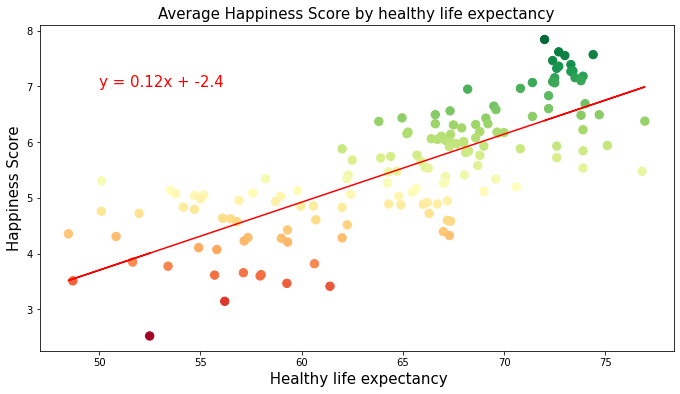

The p-value is: 6.051516845658952e-29


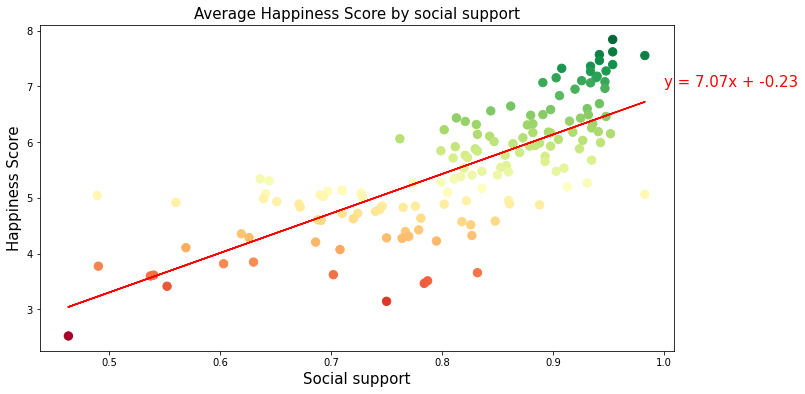

In [ ]:
# * [Part 4: correlation between healthy life expectancy, social support AND happiness score 

# average happiness score by HEALTHY LIFE EXPECTANCY
import scipy.stats as st
x_values = df_21["Health"]
y_values =  df_21["Score"]
fig=plt.figure(figsize=(25,6))
ax2=fig.add_subplot(121)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values,c=df_21["Score"],cmap="RdYlGn",s=70)
plt.plot(x_values,regress_values,"r-")


plt.xlabel(" Healthy life expectancy",size=15)
plt.ylabel("Happiness Score",size=15)
plt.title(f'Average Happiness Score by healthy life expectancy',size=15)
plt.annotate(line_eq,(50,7),fontsize=15,color="r")
print(f"The p-value is: {pvalue}")

plt.show()


# average happiness score by SOCIAL SUPPORT

x_values = df_21["Family"]
y_values =  df_21["Score"]
fig2=plt.figure(figsize=(25,6))
ax2=fig2.add_subplot(122)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values,c=df_21["Score"],cmap='RdYlGn',s=70)
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Social support",size=15)
plt.ylabel("Happiness Score",size=15)

plt.title(f'Average Happiness Score by social support',size=15)
plt.annotate(line_eq,(1,7),fontsize=15,color="r")
print(f"The p-value is: {pvalue}")

plt.show()



**Conclusion** : In the scatter plot, each points are formed in the upward right direction, that is, as the x variable(Social support, Healthy life expectancy) increases, the variable value of y(Happiness Score) also increases. 
Therefore, they show a strong positive correlation.
Also, p-values are less than 5%, hence we reject the null hypothesis and accept the alternate hypothesis. As a result, happiness does have a strong relationship with GDP per Capita.


<a name="part-5"></a>
# Part 5: Is United States a happy country

In [ ]:
hp_df = datarank.groupby("Country")
hp_df.mean()

#Find the averages of the data
hp_df = hp_df.mean().reset_index()
#hp_df["Happiness Average"] = hp_df.mean(axis=1)

hp_df=hp_df.rename(columns={'gdp_per_capita': 'GDP', 'gov_corruption': 'Corruption', "Score" : "Happiness Average"})

US is shown as a red 'x' on the boxplot


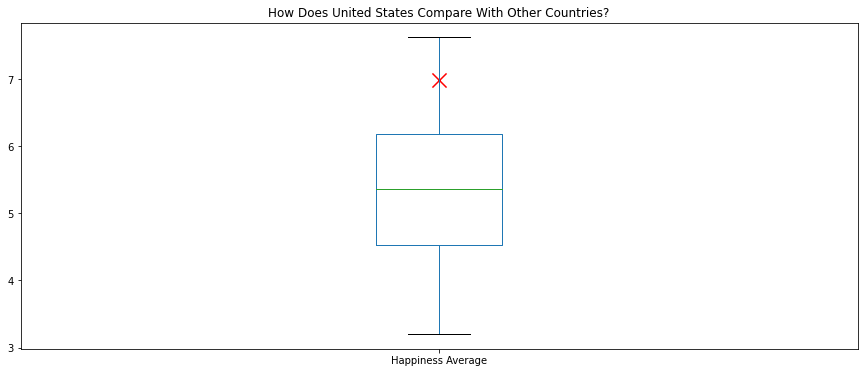

In [ ]:
print("US is shown as a red 'x' on the boxplot")
fig, ax = plt.subplots(figsize=(15,6))
hp_df.boxplot(column=['Happiness Average'], rot = 90, showfliers = False, grid = False)

# Create mask for United States
mask = hp_df.Country.str.startswith('United States', na=False)
ax.scatter(1,hp_df[mask]["Happiness Average"], 
           marker='x', s=200, color='r')
ax.tick_params(axis='x', labelrotation = 0)
plt.title("How Does United States Compare With Other Countries?")
plt.show()

The average happiness score for United States is around 7, and United States  is happier than 75% of the countries.

In [ ]:
us_df = datarank.loc[(datarank['Country'] == 'United States of America')]

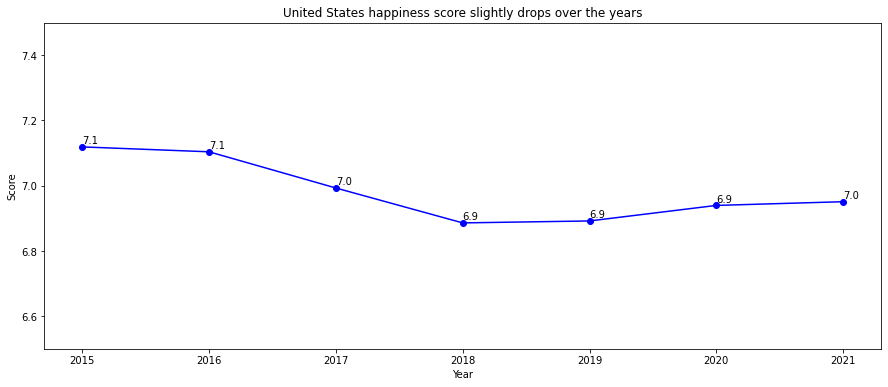

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(us_df['Year'], us_df['Score'], color="b",  marker="o")
for a,b in zip(us_df['Year'], us_df['Score']): 
    plt.text(a, b+0.01, str(round(b, 1)))
ax.set_xlabel('Year')
ax.set_ylabel('Score')
ax.set_ylim(6.5, 7.5)
ax.set_title("United States happiness score slightly drops over the years")
  
plt.show()

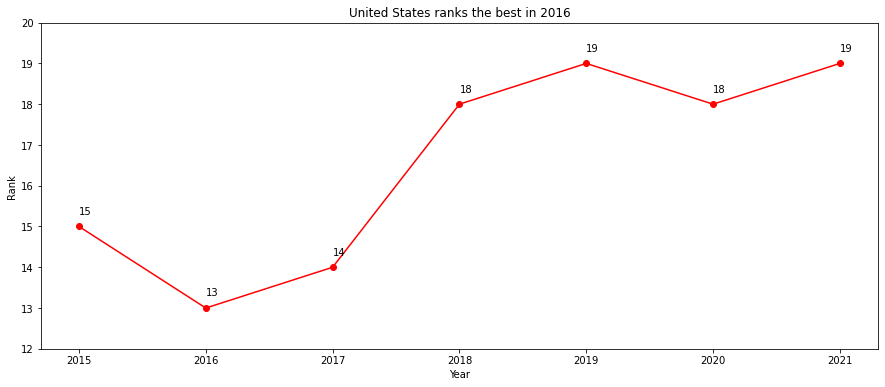

<Figure size 2160x2160 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(us_df['Year'], us_df['Rank'], color="r",marker="o")
for a,b in zip(us_df['Year'], us_df['Rank']): 
    plt.text(a, b+0.3, str(round(b, 1)))
ax.set_xlabel('Year')
ax.set_ylabel('Rank')
ax.set_ylim(12, 20)
ax.set_title("United States ranks the best in 2016")
  
plt.figure(figsize=(30, 30))
plt.show()

The rank of United States tanks a little over the years.
Considering the happiness score doesn't change much, it is in line with our finding that the happiest countries get happier over the years.

In [ ]:
print("US is shown as a red 'x' on the boxplot")
# Configure boxplot
fig, ax = plt.subplots(figsize=(15,6))
hp_df.boxplot(column=["Family", "Freedom", "Corruption", 'Generosity'], rot = 90, showfliers = False, grid = False)

# Create mask for country United States
mask = hp_df.Country.str.startswith('United States', na=False)

# Create a scatterplot using mask
ax.scatter(1, hp_df[mask]["Family"], 
           marker='x', s=200, color='r')
ax.scatter(2, hp_df[mask]["Freedom"], 
           marker='x', s=200, color='r')
ax.scatter(3, hp_df[mask]["Corruption"], 
           marker='x', s=200, color='r')
ax.scatter(4, hp_df[mask]["Generosity"], 
           marker='x', s=200, color='r')
ax.tick_params(axis='x', labelrotation = 0)

plt.title("How Does United States Compare With Other Countries?")
plt.show()

US is shown as a red 'x' on the boxplot


**Conclusion:** Comparing with the world average, United States is doing much better in generosity part. Maybe because philanthropy is a big part of the American culture. Many people have month donation to various causes. 
Family and social supports is another part US is doing really good.
Freedom is above everage but less than 75%. Many young people feel more chanlleging to move up the social ladders than before.
Corruption is in par with the world average. I think it is also an American culture of distrust in the government. 


In [ ]:
print("US is shown as a red 'x' on the boxplot")
# Configure boxplot
fig, ax = plt.subplots(1, 2, figsize=(15,6))

hp_df.boxplot(column=["GDP"], rot = 90, showfliers = False, grid = False, ax=ax[0])
hp_df.boxplot(column=["Health"], rot = 90, showfliers = False, grid = False,ax=ax[1])
# Create mask for country United States
mask = hp_df.Country.str.startswith('United States', na=False)

# Create a scatterplot using mask
ax[0].scatter(1,hp_df[mask]["GDP"], marker='x', s=200, color='r')
ax[1].scatter(1,hp_df[mask]["Health"], marker='x', s=200, color='r')


ax[0].tick_params(axis='x', labelrotation = 0)
ax[1].tick_params(axis='x', labelrotation = 0)

After comparing with the world average, we also want to compare US with the world happiest countries to see where are we lagging. So we pick the top 5 happiest country to do the comparison.

In [ ]:
# Compared with the happiest country, what is lagging
# Only look at Top 5 countries 
com_df = datarank.loc[(datarank['Rank'] <6)]
# Get the average for Top5 countries
top_avg = com_df.mean(axis=0).to_frame().T
top_avg['Country']="Top 5"
# Get the average for US across the years
us_avg = us_df.mean(axis=0).to_frame().T
us_avg['Country']="US"

In [ ]:
# Concat the US and top 5 countries df
avg_df = pd.concat([top_avg, us_avg])
# Drop the rank and year column
avg_df = avg_df.drop(['Rank', 'Year'], 1)
avg_df = avg_df.set_index('Country')
avg_df = avg_df.rename(columns={'gdp_per_capita': 'GDP', 'gov_corruption': 'Corruption'})
avg_df

In [ ]:
# To make the value comparable across different columns
avg_df['Score'] = avg_df['Score']/avg_df.at['US','Score']
avg_df['GDP'] = avg_df['GDP']/avg_df.at['US','GDP']
avg_df['Family'] = avg_df['Family'] /avg_df.at['US','Family']
avg_df['Freedom'] = avg_df['Freedom']/avg_df.at['US','Freedom']
avg_df['Health'] = avg_df['Health']/avg_df.at['US','Health']
avg_df['Corruption'] = avg_df['Corruption']/avg_df.at['US','Corruption']
avg_df['Generosity'] = avg_df['Generosity'] /avg_df.at['US','Generosity']

trans_df=avg_df.T

Since different variable are in different scales, here we did some process to make US score as the baseline so it is easier to see.

In [ ]:
ax = trans_df.plot.bar(rot=0, figsize=[15, 6])

ax.set_ylim(0.8, 1.2)
plt.show()

**Conclusion:** We find out that even compared with the happiest countries, US are doing better in GDP and Generosity score, especially Generosity.
Lack of freedom to choose what they want to pursue in life is the biggest reason why US is not happier compared with top 5 countries.
Also, the corruption is the second biggest reason.